In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

# Perceptron architecture

<img src="images/multiple_perceptrons_bias.png"/>

Based on the architecture above, with 3 inputs and 5 outputs, the prediction from a neural network's can be obtained in the following way:

$$z = W^T + b$$

$$y = f(z)$$

where $W$ is the weight matrix, $b$ are bias nodes and $f(z)$ is the threshold function. If we detail this equation based on the example above:

$$
\begin{bmatrix}
z_{0} \\
z_{1} \\
z_{2} \\
z_{3} \\
z_{4}
\end{bmatrix} = 
\begin{bmatrix}
w_{0,0} & w_{0,1} & w_{0,2} & w_{0,3} & w_{0,4} \\
w_{1,0} & w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,0} & w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4}
\end{bmatrix}^T
\cdot
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2}
\end{bmatrix} +
\begin{bmatrix}
b_{0} \\
b_{1} \\
b_{2} \\
b_{3} \\
b_{4}
\end{bmatrix}
$$

$$
\begin{bmatrix}
y_{0} \\
y_{1} \\
y_{2} \\
y_{3} \\
y_{4}
\end{bmatrix} = f \Biggl(
\begin{bmatrix}
z_{0} \\
z_{1} \\
z_{2} \\
z_{3} \\
z_{4}
\end{bmatrix}
\Biggl)
$$

However, obtaining $z$ can be simplified into a single operation, by incorporating the bias nodes into the weight matrix and adding an extra input with the value of 1:

$$
\begin{bmatrix}
z_{0} \\
z_{1} \\
z_{2} \\
z_{3} \\
z_{4}
\end{bmatrix} = 
\begin{bmatrix}
w_{0,0} & w_{0,1} & w_{0,2} & w_{0,3} & w_{0,4} \\
w_{1,0} & w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,0} & w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4} \\
b_{0}   & b_{1}   & b_{2}   & b_{3}   & b_{4} 
\end{bmatrix}
\cdot
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\
1
\end{bmatrix}
$$


# Training procedure

The training procedure is an iterative process where at each iteration/epoch we pass all the samples into the network. For each sample we compute the prediction error ($e$), and then based on $e$ and $\mu$ we calculate a $\Delta$ which we use to adjust the weights of $W$:

$$W = W + \Delta$$

This can be detailed in the following way:

$$
\begin{bmatrix}
w_{0,0} & w_{0,1} & w_{0,2} & w_{0,3} & w_{0,4} \\
w_{1,0} & w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,0} & w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4} \\
b_{0}   & b_{1}   & b_{2}   & b_{3}   & b_{4} 
\end{bmatrix}
=
\begin{bmatrix}
w_{0,0} & w_{0,1} & w_{0,2} & w_{0,3} & w_{0,4} \\
w_{1,0} & w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\
w_{2,0} & w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4} \\
b_{0}   & b_{1}   & b_{2}   & b_{3}   & b_{4} 
\end{bmatrix}
+
\begin{bmatrix}
\delta_{0,0} & \delta_{0,1} & \delta_{0,2} & \delta_{0,3} & \delta_{0,4} \\
\delta_{1,0} & \delta_{1,1} & \delta_{1,2} & \delta_{1,3} & \delta_{1,4} \\
\delta_{2,0} & \delta_{2,1} & \delta_{2,2} & \delta_{2,3} & \delta_{2,4} \\
\delta_{3,0} & \delta_{3,1} & \delta_{3,2} & \delta_{3,3} & \delta_{3,4} 
\end{bmatrix}
$$

where $\Delta$ is computed in the following way:

$$
\begin{bmatrix}
\delta_{0,0} & \delta_{0,1} & \delta_{0,2} & \delta_{0,3} & \delta_{0,4} \\
\delta_{1,0} & \delta_{1,1} & \delta_{1,2} & \delta_{1,3} & \delta_{1,4} \\
\delta_{2,0} & \delta_{2,1} & \delta_{2,2} & \delta_{2,3} & \delta_{2,4} \\
\delta_{3,0} & \delta_{3,1} & \delta_{3,2} & \delta_{3,3} & \delta_{3,4} 
\end{bmatrix}
=
-\mu
\cdot
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\
1
\end{bmatrix}
\cdot
\begin{bmatrix}
e_{0} & e_{1} & e_{2} & e_{3} & e_{4}
\end{bmatrix}
$$


### Components needed:
- Activation function
- Feed forward mechanism
- Training procedure

In [2]:
def activation(z):
    return np.where(z>=0, 1, 0)

In [3]:
def add_bias_node(X):
    return np.vstack([X, np.ones(X.shape[1])])

In [4]:
def feed_forward(W, X):
    return activation(np.dot(np.transpose(W), add_bias_node(X)))

In [5]:
def train(W, inputs, targets, epochs, lr):
    training_report = {}
    training_report[0] = [feed_forward(W, inputs), W]
    for epoch in range(epochs):
        for x, t in zip(inputs.transpose(), targets):
            y = feed_forward(W, x.reshape(1, -1).transpose())
            errors = np.subtract(y, t)
            x_with_bias = add_bias_node(x.reshape(-1, 1))
            deltas = lr * np.dot(x_with_bias, errors.transpose())
            W = np.subtract(W, deltas)
        training_report[epoch+1] = [feed_forward(W, inputs), W]
    return W, pd.DataFrame.from_dict(training_report,
                                     orient='index',
                                     columns=['output', 'weight_matrix'])

## Testing the perceptron
We are going to use the example in my [first medium article](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-14e5c02bafe).

It's a single neuron `(N=1)` with three inputs `(M=3)`

In [6]:
# M = 3
# N = 1

b = 0
W = np.array([[-1],
              [-1],
              [1],
              [b]])

x = np.array([[2],
              [-0.75],
              [2]])

t = [[0]]

print("z = ", np.dot(np.transpose(W), np.vstack([x, [1]])))
print("y = ", feed_forward(W, x))

z =  [[0.75]]
y =  [[1]]


In [7]:
W_trained, _ = train(W, x, t, 100, 0.2)

In [8]:
print("y = ", feed_forward(W_trained, x))

y =  [[0]]


It looks like for this case we were able to make the perceptron learn the right answer.

# Apply the perceptron to a real problem

In order to visualize what the perceptron can do, let's apply it to a real problem. In this notebook we are going to use the [Titanic dataset](https://www.kaggle.com/c/titanic), a dataset used to predict who survived to the Titanic disaster.

Let's load the dataset and do some basic visualisation.

In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
features = ['age', 'fare']

titanic = titanic.dropna(subset=features)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [12]:
titanic['survived'].unique()

array([0, 1])

In [13]:
t = titanic['survived'].to_numpy()

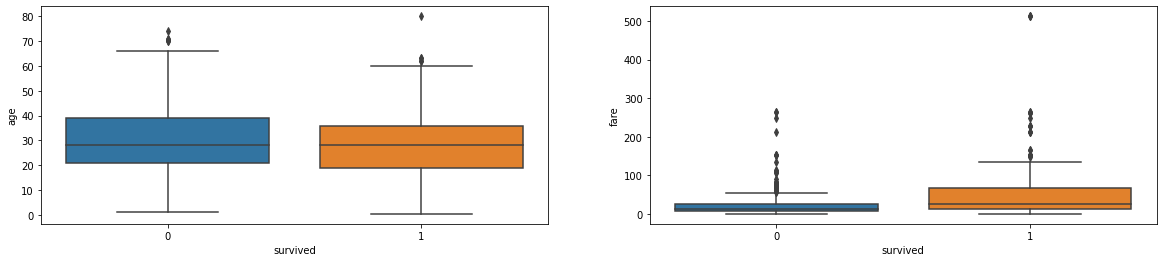

In [14]:
_, ax = plt.subplots(nrows=1,
                     ncols=len(features),
                     figsize=(20,4))

for i, feature_name in enumerate(features):
    sns.boxplot(x='survived',
                y=feature_name,
                data=titanic,
                ax=ax[i])

From a quick look at the data we were able to see that:
- There are two classes in the dataset (1 means the tripulant survived, otherwise 0). This means that we are dealing with a binary problem, as referenced in the [Medium article](https://towardsdatascience.com/the-magic-behind-the-perceptron-network-eaa461088367)
- We are going to use only two features in the dataset (age, fare). This means that our neural network will have 2 inputs. The reason behind this is for oversimplification. These are numerical features, and by using only 2 it is possible to visualise the training process easier.

## Train the model

In order to train the model, let's reuse the functions we tested in the example above. We will need:
- A set of inputs X, which we can retrieve from the dataset by choosing our features columns (`age` and `fare` in this case). X's dimension is M+1 x 714 (714 is the number of samples in the dataset).
- A set of targets t, which we can retrieve from the dataset by using the column `survived`. t's dimension is N x 714
- A weight matrix W. In this case we initialize it randomly with values between 0 and 1. W's dimension is M+1 x N

In [15]:
M = 2
N = 1
X = np.asarray(titanic[features]).transpose()
X

array([[22.    , 38.    , 26.    , ..., 19.    , 26.    , 32.    ],
       [ 7.25  , 71.2833,  7.925 , ..., 30.    , 30.    ,  7.75  ]])

In [16]:
W = np.random.rand(M + 1, N) # +1 because of the bias node
W

array([[0.89272864],
       [0.39915958],
       [0.74430886]])

In [17]:
def error_rate(y, t):
    n_incorrect_samples = len(list(filter(lambda result: result[0] != result[1], zip(y, t))))
    return n_incorrect_samples/len(y)

In [18]:
y = feed_forward(W, X)
error_rate(y.flatten().tolist(), t.tolist())

0.5938375350140056

In [19]:
W_trained, report = train(W, X, t, 20, 0.1)

In [20]:
W_trained

array([[-5.34527136],
       [ 7.39077958],
       [-8.15569114]])

In [21]:
y = feed_forward(W_trained, X)
error_rate(y.flatten().tolist(), t.tolist())

0.31512605042016806

## Visualizing the training process

In order to visualise the training process, I am going to create an animation which can show what the neural network is predicting, which predictions are incorrect and the **decision boundary**

Assuming we can visualise a plot where the x-axis is the age feature and y-axis is the fare feature, we can get an equation to draw the decision boundary.

$$
w_{0} \cdot x_{0} + w_{1} \cdot x_{1} + b = 0
$$
$$
\Leftarrow\kern-4pt\Rightarrow w_{0} \cdot x_{0} = - w_{1} \cdot x_{1} - b
$$
$$
\Leftarrow\kern-4pt\Rightarrow x_{0} = \frac{- w_{1} \cdot x_{1} - b}{w_{0}}
$$

In [22]:
def define_decision_boundary(W):
    x = list(range(100))
    y = [(- W[1][0] * i - W[2][0])/W[0][0] for i in x]
    return x, y    

In [23]:
%%capture
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(6, 6))


def assign_color(y, t):
    if y==t and t==1: # 'Survived' prediction was correct
        return 'green'
    elif y==t and t==0: # 'Not Survived' prediction was correct
        return 'orange'
    else: # Incorrect prediction
        return 'gray'
        

def animate(i):
    
    ax.cla()
    
    colors = [assign_color(y,t) for y,t in zip(report['output'][i].flatten(), titanic['survived'])]
    
    error_rate = len(list(filter(lambda x: x=="gray", colors)))/len(colors)
    ax.text(1, 140, f'Epoch:{i}    Error %: {round(error_rate, 3)}', bbox={'facecolor': 'red', 'alpha': 0.1})
    
    ax.scatter(x=titanic['fare'], y=titanic['age'], c=colors)

    x, y = define_decision_boundary(report['weight_matrix'][i])
    
    ax.plot(x, y)
    ax.set_xlim(0, 90)
    ax.set_ylim(-50, 150)

final_animation = animation.FuncAnimation(fig,
                                          animate,
                                          frames=20,
                                          interval=400,
                                          repeat=False)

In [24]:
final_animation

# Final considerations

We have seen that overall, there is some learning happening as the error rate decreased after 20 epochs, from 0.59 to 0.31. However, we can still think and identify a couple of reasons why our model did not perform better.

#### Perceptron's limitations

The perceptron is only able to solve linearly separable problems. We can see from the animation above that this is clearly not the case. No matter the line you draw, you will always gray dots on the plot (incorrectly predicted samples).

#### More features

Although we used two features for the sake of visualisation and interpretability, that may not be benefitial in terms of results, as perhaps linear separability can be achieved (or at least closer to that) if we work with more dimensions.

## A glimpse of what can be done with more features and more epochs to train

For more ideas on how to prepare the data and check how we could apply other models on the Titanic dataset, you can check [this article](https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280?gi=6425b129f977)

In [25]:
M = 5
N = 1
X = np.asarray(titanic[features + ['pclass', 'sibsp', 'adult_male']]).transpose()

W = np.random.rand(M + 1, N) # +1 because of the bias node

W_trained, report = train(W, X, t, 100, 0.1)

y = feed_forward(W_trained, X)
error_rate(y.flatten().tolist(), t.tolist())

0.24649859943977592